In [1]:
import csv
import random
import math
import numpy as np

def loadCsv(filename):
    lines = csv.reader(open(filename, newline=''), delimiter=',', quotechar='|')
    next(lines)
    dataset = []
    for row in lines:
        dataset.append([float(x) for x in row])
    return dataset
def splitDataset(dataset, splitRatio):
    trainSize = int(len(dataset) * splitRatio)
    trainSet = []
    copy = list(dataset)
    while len(trainSet) < trainSize:
        index = random.randrange(len(copy))
        trainSet.append(copy.pop(index))
    return [trainSet, copy]

filename = 'readmission.csv'
dataset = loadCsv(filename)

trainingSet, valSet = splitDataset(dataset, .8)

X_train = [row[0:68] for row in trainingSet]
Y_train = [row[-1] for row in trainingSet]

X_val = [row[0:68] for row in valSet]
Y_val = [row[-1] for row in valSet]

eigvals
68


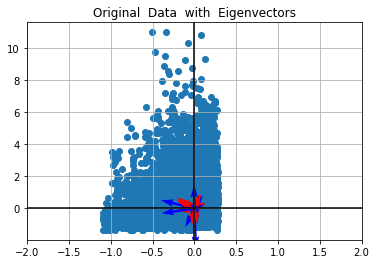

In [6]:
#PCA
import  numpy  as np
import  matplotlib.pyplot  as plt

#Construct  a 2D  array  holding  our  data

### Compute  the  column -wise  mean  values
#this  numpy  function  calculates  the  average  along  an  axis  for  us.
#axis=0  specifies  to  average  down  rows ,  rather  than  across
#columns  (axis=1)
mean_vector = np.average(X_train,axis=0)

#### Subtract  the  mean  from  the  data
normalizedX = X_train-mean_vector

### Compute  covariance  matrix  (numpy  has a  handy  function  to do#this  for  us)
#we  need  to  take  the  transpose  of  the  data  (.T)  because  the
# covariance  function  expects  inputs  to  be  ordered  as
#[[x1 ,x2 ,x3],[y1 ,y2 ,y3]]  rather  than  [[[x1 ,y1],[x2 ,x2],[x3 ,y3]]
covariance_matrix = np.cov(normalizedX.T)

#### Compute  eigenvalues  and  eigenvectors#Using  numpy:
eigenvalues , eigenvectors = np.linalg.eig(covariance_matrix)

#Lets  look  at  our  eigenvalues  and  eigenvectors :
print ("eigvals")
print(len(eigenvalues))
fig , ax = plt.subplots()
ax.scatter(normalizedX[:,0],normalizedX[:,1])
origin = [0],[0]#  origin  point
plt.quiver(*origin , eigenvectors[0,:], eigenvectors[1,:], color=['r','b'], scale=5)
ax.set_title("Original  Data  with  Eigenvectors")
ax.set_xlim([-2,2])
ax.grid(True , which='both')
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')
plt.show()

transformedX = np.matmul(normalizedX ,eigenvectors)

In [15]:
import  numpy  as np
from  sklearn.decomposition  import  PCA

pca = PCA(n_components=68)

pca.fit(X_train)
print(pca.explained_variance_ratio_)
transformedX = pca.transform(X_train)

print ('COMPONENTS')
top8Components = pca.components_[0:8]
print(abs( pca.components_ [0:8]))

top8Np = np.array(top8Components)
col_totals = np.sum(top8Np, axis=0)
print ("TOTAL")
print (col_totals)



[1.95549416e-01 8.32644985e-02 6.02433330e-02 5.45379373e-02
 4.21842375e-02 3.94273873e-02 3.66852546e-02 3.64992887e-02
 3.24253175e-02 2.96787653e-02 2.77822524e-02 2.58406250e-02
 2.53216352e-02 2.24402861e-02 2.15773508e-02 2.07067470e-02
 1.72168544e-02 1.58634861e-02 1.55542186e-02 1.52889695e-02
 1.43413350e-02 1.37556874e-02 1.25639472e-02 1.15233381e-02
 1.08223417e-02 1.04122264e-02 9.64735888e-03 9.19624472e-03
 7.51393598e-03 7.18276297e-03 6.77506233e-03 5.79291351e-03
 5.58264220e-03 5.05451210e-03 4.29464171e-03 4.07958006e-03
 3.69768994e-03 3.48679660e-03 3.18909865e-03 3.11413080e-03
 3.00579379e-03 2.72330572e-03 2.44450865e-03 2.32077404e-03
 2.09768918e-03 2.02383952e-03 1.76952143e-03 1.63765879e-03
 1.57594547e-03 1.54633131e-03 1.25513552e-03 1.23347936e-03
 1.17960455e-03 1.01298700e-03 9.36439246e-04 6.83384909e-04
 4.42961449e-04 3.65679714e-04 3.38722627e-04 3.12255679e-04
 2.76101735e-04 2.44666343e-04 1.68407339e-04 1.32791702e-04
 8.06174818e-05 7.273418

In [ ]:
heavyWeightIndex = []

for i in range (len(col_totals)):
    if abs(weightsFinal[i]) >= 0.002:
        heavyWeightIndex.append(i)
        
print (heavyWeightIndex)
print (len(heavyWeightIndex))